### Importando

In [1]:
import pandas as pd

url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'

df = pd.read_csv(url, sep=';')
df.head(7)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0


### Exploración inicial de los datos

In [2]:
df.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
1241,Conjunto Comercial/Sala,Centro Histórico,0,0,0,641,70000.0,25322.5,9464.0
15911,Departamento,Condesa,3,0,1,100,14000.0,3290.0,735.0
5778,Conjunto Comercial/Sala,Condesa,0,0,0,25,4200.0,1680.0,490.0
4462,Conjunto Comercial/Sala,Santa Fe,0,1,0,34,8750.0,2142.0,3304.0
2356,Conjunto Comercial/Sala,Centro Histórico,0,0,0,35,2100.0,1120.0,196.0


In [3]:
df.shape

(25121, 9)

In [4]:
df.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [6]:
df['Tipo']

0                       Cocineta
1                           Casa
2        Conjunto Comercial/Sala
3                   Departamento
4                   Departamento
                  ...           
25116    Cochera/Estacionamiento
25117                   Cocineta
25118               Departamento
25119               Departamento
25120    Conjunto Comercial/Sala
Name: Tipo, Length: 25121, dtype: object

In [7]:
df[['Habitaciones', 'Valor']]

,Habitaciones,Valor
0,1,5950.0
1,2,24500.0
2,0,18200.0
3,1,2800.0
4,1,2800.0
...,...,...
25116,0,49000.0
25117,0,2800.0
25118,2,4900.0
25119,2,10500.0


### Valores promedio de alquiler por tipo de inmueble

In [8]:
df['Valor'].mean()

np.float64(36885.05048392878)

In [9]:
df.groupby('Tipo').mean(numeric_only=True)

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.359633,1.897248,1.438532,289.943119,31453.177064,3699.421642,6629.404851
Casa Comercial,1.801980,2.118812,0.257426,370.277228,54735.841584,7622.192308,6166.063380
Casa de Condominio,4.319672,3.555738,3.247541,566.303279,51428.609836,5286.578804,15046.939394
Casa de Vecindad,1.974684,0.379747,0.215190,79.981013,5961.740506,413.444444,706.850000
Cochera/Estacionamiento,0.064935,1.376623,0.000000,18.662338,6995.454545,1069.075000,449.458333
Cocineta,0.836088,0.020661,0.041322,29.090909,4425.856061,1521.734214,280.701461
Conjunto Comercial/Sala,0.047175,2.686323,0.000352,236.323711,57675.214550,17489.361142,5425.980245
Departamento,2.504199,1.256367,0.891899,124.014292,18683.269431,6797.092951,2634.921081
Departamento en Hotel,1.419780,0.969231,0.758242,65.848352,16285.430769,7250.650602,1768.923885


In [10]:
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


In [11]:
df_tipos = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

<Axes: ylabel='Tipo'>

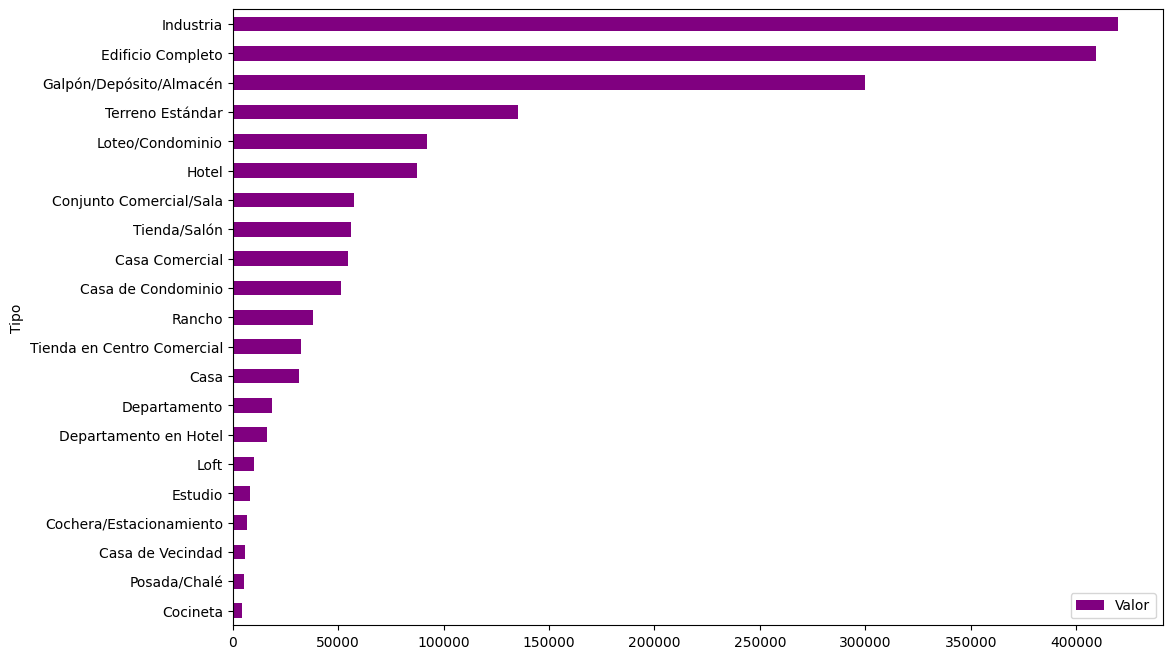

In [12]:
df_tipos = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipos.plot(kind='barh', figsize=(12,8), color='purple')

In [13]:
df.Tipo.unique

<bound method Series.unique of 0                       Cocineta
1                           Casa
2        Conjunto Comercial/Sala
3                   Departamento
4                   Departamento
                  ...           
25116    Cochera/Estacionamiento
25117                   Cocineta
25118               Departamento
25119               Departamento
25120    Conjunto Comercial/Sala
Name: Tipo, Length: 25121, dtype: object>

In [14]:
inmuebles = [
    'Conjunto Comercial/Sala',
    'Edificio Completo',
    'Tienda/Salón',
    'Casa Comercial',
    'Terreno Estándar',
    'Cochera/Estacionamiento',
    'Galpón/Depósito/Almacén',
    'Tienda en Centro Comercial',
    'Hotel',
    'Loteo/Condominio',
    'Industria'
]

df.query('@inmuebles in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
11,Edificio Completo,Roma,0,0,0,536,98000.0,NaN,12470.5
24,Conjunto Comercial/Sala,Santa Fe,0,1,0,22,2450.0,NaN,NaN
26,Conjunto Comercial/Sala,Centro Histórico,0,5,0,1306,411390.0,68201.0,NaN
...,...,...,...,...,...,...,...,...,...
25107,Conjunto Comercial/Sala,Santa Fe,0,1,0,55,7000.0,3836.0,NaN
25110,Conjunto Comercial/Sala,Centro Histórico,0,0,0,140,14000.0,4942.0,1736.0
25112,Conjunto Comercial/Sala,Centro Histórico,0,0,0,32,2100.0,3622.5,290.5
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN


In [15]:
df_inmuebles = df.query('@inmuebles not in Tipo')

<Axes: ylabel='Tipo'>

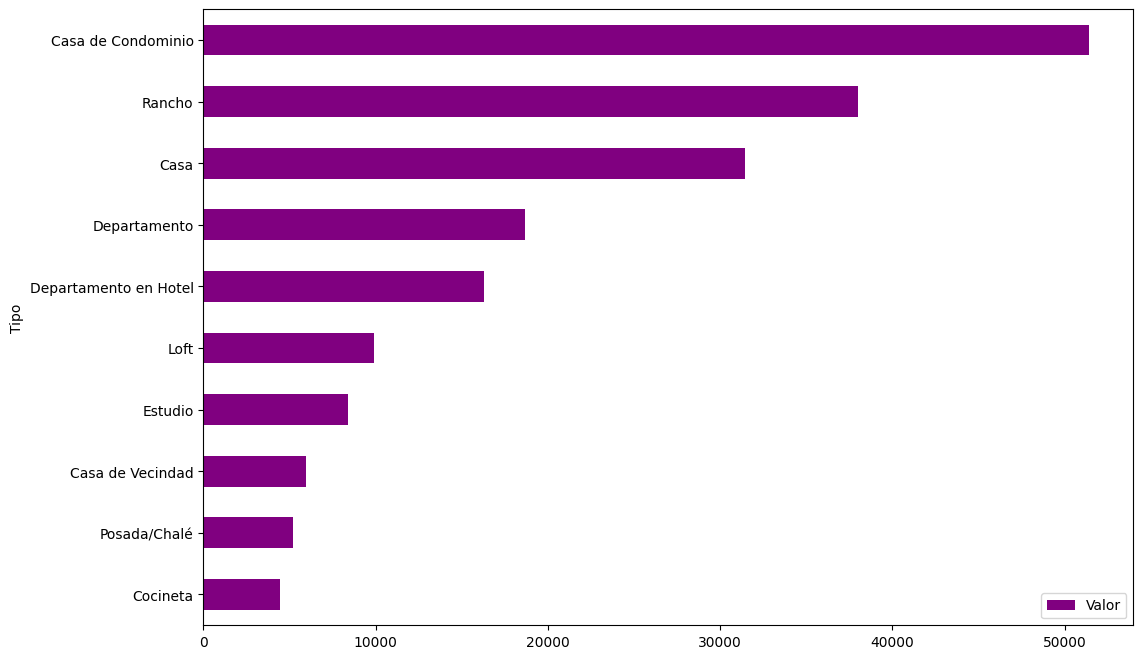

In [16]:
df_tipos = df_inmuebles.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipos.plot(kind='barh', figsize=(12,8), color='purple')

### Porcentaje de cada tipo de inmueble presente en la base de datos

In [17]:
df.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [18]:
df.Tipo.value_counts()

Tipo
Departamento                  14764
Conjunto Comercial/Sala        5681
Tienda/Salón                   1098
Cocineta                        726
Casa de Condominio              610
Casa                            545
Departamento en Hotel           455
Galpón/Depósito/Almacén         289
Edificio Completo               217
Casa Comercial                  202
Tienda en Centro Comercial      197
Casa de Vecindad                158
Cochera/Estacionamiento          77
Terreno Estándar                 45
Loft                             38
Rancho                            8
Estudio                           4
Loteo/Condominio                  3
Hotel                             2
Posada/Chalé                      1
Industria                         1
Name: count, dtype: int64

In [19]:
df.Tipo.value_counts(normalize=True)

Tipo
Departamento                  0.587715
Conjunto Comercial/Sala       0.226145
Tienda/Salón                  0.043708
Cocineta                      0.028900
Casa de Condominio            0.024282
Casa                          0.021695
Departamento en Hotel         0.018112
Galpón/Depósito/Almacén       0.011504
Edificio Completo             0.008638
Casa Comercial                0.008041
Tienda en Centro Comercial    0.007842
Casa de Vecindad              0.006290
Cochera/Estacionamiento       0.003065
Terreno Estándar              0.001791
Loft                          0.001513
Rancho                        0.000318
Estudio                       0.000159
Loteo/Condominio              0.000119
Hotel                         0.000080
Posada/Chalé                  0.000040
Industria                     0.000040
Name: proportion, dtype: float64

<Axes: xlabel='Tipo', ylabel='Porcentaje'>

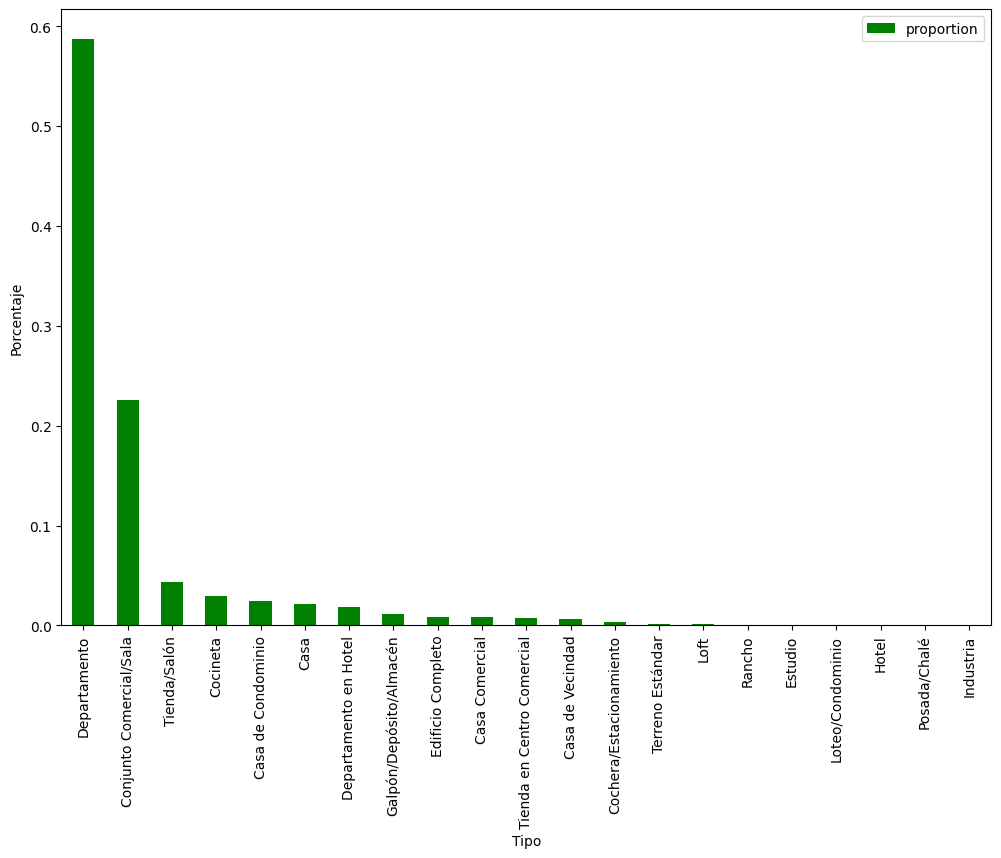

In [20]:
porcentaje_tipo = df.Tipo.value_counts(normalize=True).to_frame()
porcentaje_tipo.plot(kind='bar', figsize=(12,8), color='green', xlabel='Tipo', ylabel='Porcentaje')

In [21]:
df_dep = df.query('Tipo == "Departamento"')
df_dep.head(2)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [22]:
df_dep.shape

(14764, 9)

### Promedio de habitaciones por departamento

In [23]:
df_dep['Habitaciones'].mean()

np.float64(2.5041994039555675)

### Cuántas colonias únicas existen en la base de datos

In [24]:
df.Colonia.nunique()

88

### Colonias con el promedio de alquiler más alto

In [25]:
alquiler = df.groupby('Colonia')['Valor'].mean().sort_values(ascending=False)
alquiler

Colonia
San Juan Xalpa          420926.739130
Nativitas               244684.395062
La Merced               213292.770833
Santa Marta Acatitla    166048.105263
Villa de Cortés         135737.411765
                            ...      
Álvaro Obregón            3048.281250
San José Insurgentes      2660.000000
El Rodeo                  2586.111111
Tláhuac                   2481.818182
Las Aguilas               2222.500000
Name: Valor, Length: 88, dtype: float64

### Las 5 colonias con los promedios de alquiler más altos

<Axes: xlabel='Precio', ylabel='Colonia'>

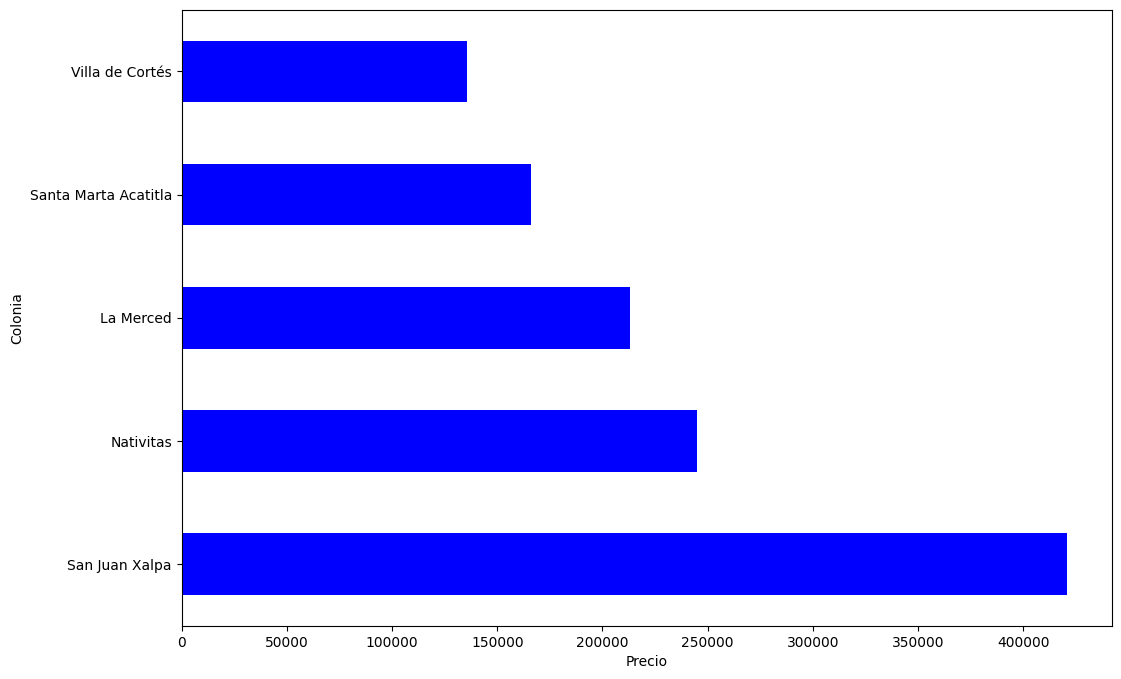

In [26]:
alquiler.head().plot(kind='barh', figsize=(12,8), color='blue', xlabel='Precio')

### Tratamiento de datos nulos

In [27]:
df_dep.isnull()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25111,False,False,False,False,False,False,False,False,False
25113,False,False,False,False,False,False,False,False,False
25114,False,False,False,False,False,False,False,False,False
25118,False,False,False,False,False,False,False,False,False


In [28]:
df_dep.isnull().sum()

Tipo               0
Colonia            0
Habitaciones       0
Garages            0
Suites             0
Area               0
Valor              7
Condominio       493
Impuesto        3797
dtype: int64

In [29]:
df_dep = df_dep.fillna(0)
df_dep.isnull().sum()

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

### Remover registros inconsistentes

In [30]:
df_dep.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
116,Departamento,El Rosedal,2,1,0,50,3850.0,0.0,0.0
136,Departamento,Santa Fe,1,1,1,65,8225.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24721,Departamento,Doctores,2,0,0,43,3150.0,0.0,56.0
24736,Departamento,Condesa,1,0,0,30,9100.0,0.0,0.0
24866,Departamento,Condesa,3,0,0,130,16100.0,0.0,0.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,0.0,0.0


In [31]:
df_remove = df_dep.query('Valor==0 | Condominio==0').index
df_dep.drop(df_remove, axis=0, inplace=True)

In [32]:
df_dep.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto


In [33]:
df_dep.Tipo.unique()

array(['Departamento'], dtype=object)

In [34]:
df.drop('Tipo', axis=1, inplace=True)
df.sample()

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
439,Condesa,1,0,0,30,9100.0,1750.0,NaN


### Creando filtros

#### 1. Apartamentos que tienen 1 dormitorio y un alquiler menor a MXN 4200

In [35]:
select1 = df_dep['Habitaciones'] == 1

In [36]:
type(select1)

pandas.core.series.Series

In [37]:
df_dep[select1]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
...,...,...,...,...,...,...,...,...,...
25090,Departamento,Coyoacán,1,0,0,55,7000.0,2205.0,66.5
25092,Departamento,Santa Fe,1,1,0,62,5950.0,3307.5,630.0
25100,Departamento,Lomas de Chapultepec,1,1,1,50,15050.0,6055.0,906.5
25103,Departamento,Condesa,1,0,0,50,6825.0,1575.0,245.0


In [38]:
select2 = df_dep['Valor'] < 4200
df_dep[select2]

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Departamento,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...,...
25038,Departamento,Villa de Guadalupe,2,1,0,50,2800.0,1435.0,0.0
25051,Departamento,Nativitas,2,1,0,62,3500.0,1050.0,0.0
25065,Departamento,Nativitas,2,1,0,50,3150.0,1050.0,0.0
25095,Departamento,Lindavista Sur,2,0,0,63,2800.0,1372.0,0.0


In [39]:
filter1 = select1 & select2
df_filter1 = df_dep[filter1]

#### 2. Apartamentos que tienen al menos 2 dormitorios, un alquiler a menos de MXN 10500 y una superficie mayor a 70 m²

In [40]:
filter2 = (df_dep['Habitaciones'] >= 2) & (df_dep['Valor'] < 10500) & (df_dep['Area'] > 70)
df_filter2 = df_dep[filter2]

### Guardando los archivos

In [41]:
df_dep.to_csv('inmuebles_ml.csv')

In [42]:
pd.read_csv('inmuebles_ml.csv')

,Unnamed: 0,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
1,4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
2,8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
3,10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
4,13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
...,...,...,...,...,...,...,...,...,...,...
14259,25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
14260,25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
14261,25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
14262,25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [43]:
df_filter1.to_csv('inmuebles_ml_filter1.csv', index=False, sep=';')
df_filter2.to_csv('inmuebles_ml_filter2.csv', index=False, sep=';')

### Crear columnas numéricas

#### 1. `valor_mensual`: gastos mensuales de cada propiedad, incluyendo alquiler y condominio

In [44]:
datos = pd.read_csv(url, sep=';')
datos.shape

(25121, 9)

In [45]:
datos['Valor_mensual'] = datos['Valor'] + datos['Condominio']
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0


#### 2. `valor_anual`: gastos anuales por propiedad (impuesto + 12 meses de alquiler y condominio)

In [46]:
datos['Valor_anual'] = datos['Valor_mensual'] * 12 + datos['Impuesto']
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN


### Crear columnas categóricas

#### `descripción`: Resumen de la información clave de las propiedades que se mostrarán en el sitio web

In [47]:
datos['Descripcion'] = (datos['Tipo'] + ' en la colonia ' + datos['Colonia'] +
                        ' con ' + datos['Habitaciones'].astype(str) + ' cuartos(s) y ' +
                        datos['Garages'].astype(str) + ' plazas de estacionamiento.')
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuartos(s...
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuartos(s) y ...
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en la colonia Centro Histórico co...
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 cua...


In [48]:
datos.sample().Descripcion

353    Departamento en la colonia Santa Fe con 4 cuar...
Name: Descripcion, dtype: object

#### `tiene_suite`: Indica si la propiedad tiene suite o no

In [49]:
datos['Tiene_suite'] = datos['Suites'].apply(lambda x: 'Si' if x > 0 else 'No')
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuartos(s...,No
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuartos(s) y ...,Si
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...,No
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en la colonia Centro Histórico co...,No
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 cua...,No


In [50]:
datos.to_csv('inmuebles_dev.csv', index=False, sep=';')